In [1]:
from sklearn.model_selection import train_test_split
import csv
import os
import sys
from __future__ import division
import urllib
import csv
from string import punctuation
import jieba
from math import*
import codecs
from nltk import word_tokenize
import os 
import sys 
import nltk 
import io 
from nltk.corpus import stopwords 
import re 
from nltk.corpus import wordnet as wn 
from nltk.tokenize import word_tokenize
import json
import numpy as np
import numpy.linalg as LA
import string
import csv
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import LSTM
import os
import pandas as pd
#from pandas_ml import ConfusionMatrix
import re
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time
from sklearn import preprocessing 
from keras.layers import merge
from keras.layers import Merge
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Convolution1D, GlobalMaxPooling1D
from keras.utils import np_utils
from sklearn.metrics import classification_report
#from keras.layers import Conv2D, Maxpooling2D,ZeroPadding2D

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

cols=['genre__Action',
      'genre__Adventure', 
      'genre__Animation', 
      'genre__Biography', 
      'genre__Comedy', 
      'genre__Crime', 
      'genre__Documentary', 
      'genre__Drama', 
      'genre__Family', 
      'genre__Horror', 
      'genre__Music', 
      'genre__Mystery',
      'genre__Sci-Fi',
      'star', 
      'runtime',
      'user',
      'critc',
      'dir_popu',
      'ac1_popu',
      'ac2_popu',
      'ac3_popu',
      'n_of_posters', 
      #'opening_box_office',
      'budget_mixed',
      'year_encode'
     ] 

target = "target_paper_label"
###################################################    

all_df = pd.read_excel('6cate/O_H_all_6cate_3436_movie_0830.xlsx')
y_df = pd.read_excel('6cate/O_H_all_6cate_3436_movie_0830.xlsx')
all_df = all_df[cols]
#print(train_df)
y_all=y_df[target]

y_all = np_utils.to_categorical(y_all, num_classes=6)
print(y_all.shape)

all_df = all_df.values


minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))  
all_df = minmax_scale.fit_transform(all_df)
X_train, X_test, y_train, y_test = train_test_split(all_df, y_all, random_state=5)

######################################################


Using TensorFlow backend.


(3436, 6)


In [2]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2577, 24) (859, 24) (2577, 6) (859, 6)


In [3]:
#y_test

Activate function: softmax  Loss Function: categorical_crossentropy  Optimizer: Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 72)                1800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               9344      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 192)               24768     
_________________________________________________________________
dropout_3 (Dropout)          (None, 192)               0         
_________________________________________________________

0s - loss: 1.3237 - acc: 0.4347 - val_loss: 1.2547 - val_acc: 0.4806
Epoch 74/150
0s - loss: 1.3057 - acc: 0.4537 - val_loss: 1.2669 - val_acc: 0.4922
Epoch 75/150
0s - loss: 1.3183 - acc: 0.4299 - val_loss: 1.2766 - val_acc: 0.4438
Epoch 76/150
0s - loss: 1.3096 - acc: 0.4386 - val_loss: 1.2622 - val_acc: 0.4535
Epoch 77/150
0s - loss: 1.3210 - acc: 0.4512 - val_loss: 1.2558 - val_acc: 0.4903
Epoch 78/150
0s - loss: 1.3369 - acc: 0.4377 - val_loss: 1.2504 - val_acc: 0.5136
Epoch 79/150
0s - loss: 1.3318 - acc: 0.4275 - val_loss: 1.2689 - val_acc: 0.4767
Epoch 80/150
0s - loss: 1.3266 - acc: 0.4435 - val_loss: 1.2692 - val_acc: 0.4864
Epoch 81/150
0s - loss: 1.3161 - acc: 0.4377 - val_loss: 1.2621 - val_acc: 0.4767
Epoch 82/150
0s - loss: 1.3008 - acc: 0.4541 - val_loss: 1.2509 - val_acc: 0.4632
Epoch 83/150
0s - loss: 1.3174 - acc: 0.4367 - val_loss: 1.2517 - val_acc: 0.5019
Epoch 84/150
0s - loss: 1.3162 - acc: 0.4454 - val_loss: 1.2540 - val_acc: 0.4709
Epoch 85/150
0s - loss: 1.298

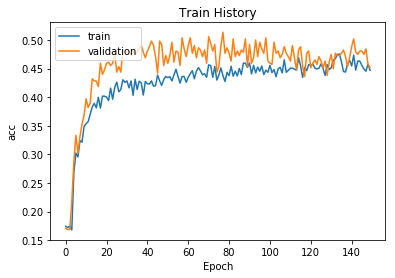

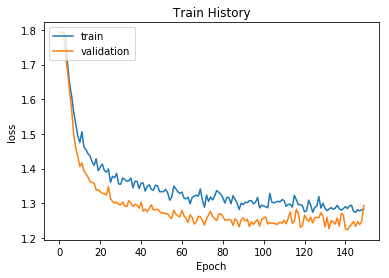

 32/859 [>.............................] - ETA: 0s
 Test loss: 1.39961965814 


 Test Accuracy: 0.388824213821 

 32/859 [>.............................] - ETA: 0s
 It cost 26.232870 sec
-----------------------------------------------------------------------
finish


In [4]:
#categorical_crossentropy
myactivatefunction=['softmax']
mylossfunction=['categorical_crossentropy']
myoptimizers=['Adam']

for i in range(0,1):        
    for j in range(0,1):
        for k in range(0,1):    
            tStart=time.time()
            time.sleep(2)
                
            print('Activate function:',myactivatefunction[i],' Loss Function:',mylossfunction[j],' Optimizer:',myoptimizers[k])    
            
            model = Sequential()  

            model.add(Dense(units=72, input_dim=len(cols), kernel_initializer='uniform', activation='relu'))
            model.add(Dropout(0.6))
            #model.add(Dense(units=108, kernel_initializer='uniform', activation='relu'))
            #model.add(Dropout(0.4))
            model.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
            model.add(Dropout(0.6))
            model.add(Dense(units=192, kernel_initializer='uniform', activation='relu'))
            model.add(Dropout(0.6))
            model.add(Dense(units=256, kernel_initializer='uniform', activation='relu'))
            model.add(Dropout(0.6))
            model.add(Dense(units=192, kernel_initializer='uniform', activation='relu'))
            model.add(Dropout(0.6))
            model.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
            model.add(Dropout(0.6))
            #model.add(Dense(units=108, kernel_initializer='uniform', activation='relu'))
            #model.add(Dropout(0.4))
            model.add(Dense(units=72, kernel_initializer='uniform', activation='relu'))
            model.add(Dropout(0.6))
            model.add(Dense(units=6,activation=myactivatefunction[i]))
            
            model.summary()
            model.compile(loss=mylossfunction[i],optimizer=myoptimizers[j],metrics=['accuracy'])  
   
            train_history=model.fit(X_train, y_train, batch_size=64, epochs=150,verbose=2 ,validation_split=0.2)

            show_train_history(train_history,'acc','val_acc')
            show_train_history(train_history,'loss','val_loss')

            scores=model.evaluate(X_test,y_test,verbose=1)
            print('\n','Test loss:', scores[0],'\n')
            print('\n','Test Accuracy:',scores[1],'\n')

            predict=model.predict_classes(X_test)
            
            tEnd=time.time()
            print("\n It cost %f sec"%(tEnd-tStart))
            print('-----------------------------------------------------------------------')  
            print("finish")

In [5]:
scores=model.evaluate(X_test,y_test,verbose=1)
print('\n')
print('Test loss:', scores[0])
print('Test Accuracy:',scores[1],'\n')

 32/859 [>.............................] - ETA: 0s

Test loss: 1.39961965814
Test Accuracy: 0.388824213821 



In [6]:
#y_test=(test_df['year_box_office_label'])
#y_test = np_utils.to_categorical(y_test, num_classes=6)
y_label_test_Onehot = np_utils.to_categorical(predict)

In [7]:
print(classification_report(y_test, y_label_test_Onehot, target_names=['R0', 'R1', 'R2', 'R3', 'R4', 'R5']))

             precision    recall  f1-score   support

         R0       0.60      0.42      0.49       146
         R1       0.32      0.45      0.37       137
         R2       0.25      0.39      0.31       136
         R3       0.33      0.31      0.32       153
         R4       0.34      0.35      0.35       137
         R5       0.93      0.41      0.57       150

avg / total       0.47      0.39      0.40       859



In [8]:
y_test_num = np.argmax(y_test,axis=1)
#y_test_num

In [9]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test_num, predict)
CM

array([[61, 52, 20,  6,  7,  0],
       [33, 62, 37,  2,  2,  1],
       [ 6, 57, 53, 17,  3,  0],
       [ 0, 20, 66, 48, 17,  2],
       [ 0,  2, 29, 56, 48,  2],
       [ 1,  1,  6, 16, 64, 62]])

In [10]:
bingo = 0
one_away = 0

for i in range(0, 6):
    #print(CM[i][i]) ## bingo
    bingo = bingo + CM[i][i]
print('BINGO: ', bingo)

one_away = CM[0][1] + CM[1][2] + CM[2][3] +  CM[3][4] +  CM[4][5] +  CM[1][0] +  CM[2][1] +  CM[3][2] +  CM[4][3] +  CM[5][4] 
print('1-AWAY: ',one_away)
print('total: ',bingo+one_away)

(bingo+one_away)/len(y_test_num)

BINGO:  334
1-AWAY:  401
total:  735


0.8556461001164144

In [11]:
df = pd.DataFrame({'predict':predict,
     'labels':y_test_num})
df.corr()

,labels,predict
labels,1.000000,0.769816
predict,0.769816,1.000000


In [12]:
#######all_df = pd.read_excel('6cate/O_H_all_6cate_3436_movie_0828_2.xlsx')
#####y_df = pd.read_excel('6cate/O_H_all_6cate_3436_movie_0828_2.xlsx')
######all_df = all_df[cols]
#print(train_df)
#########y_all=y_df[target]
########X_train, X_test, y_train, y_test = train_test_split(all_df, y_all, random_state=5)
#########print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [13]:
#y_test

In [14]:
#predict